In [5]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

%load_ext autoreload
%autoreload 2

from regression.feature_extraction import FeatureExtractor, LabelLoader
from regression.model import Regressor
import os
import pickle
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [6]:
%cd /Users/steed/caliskan/git/caliskan-image-bias/caliskan-retraining-inception

/Users/steed/caliskan/git/caliskan-image-bias/caliskan-retraining-inception


In [7]:
image_dir = "data/maxdistinct"
test_dir = "data/random"
label = "Trustworthy"

In [8]:
# get face embeddings for all the training data
features_train = FeatureExtractor(image_dir).get_features()
features_train_aligned = FeatureExtractor('{}_aligned'.format(image_dir)).get_features()
print(features_train.shape)
print(features_train_aligned.shape)

(3750, 130)
(3750, 130)


In [9]:
# export to TSV for UMAP, TSNE
for trait in ["Trustworthy", "Likeable", "Competent", "Extroverted", "Attractive", "Dominant", "all"]:
    features_trait = features_train_aligned[
        features_train_aligned["Source"] == "25MaxDistinct_{}-FineGrain".format(trait)
    ] if trait != "all" else features_train_aligned
    features = features_trait.loc[:, range(2,130)]
    meta = features_trait.loc[:, "Face name"]
    features.to_csv("output/features/features_{}.tsv".format(trait), sep="\t", header=False)
    meta.to_csv("output/features/meta_{}.tsv".format(trait), sep="\t", header=True)

In [10]:
features

,2,3,4,5,6,7,8,9,10,11,...,120,121,122,123,124,125,126,127,128,129
0,-2.114064,-0.662332,-0.972744,0.122952,-0.126157,-1.019866,-0.908351,-1.021564,0.279948,-1.842592,...,-0.679171,2.713553,1.953116,0.977031,-0.506659,-0.442123,-1.387565,0.565997,0.919328,-0.724817
1,-1.130401,-1.540931,-0.271986,0.236412,0.061756,0.040805,-0.025726,-2.193064,0.085015,-1.819598,...,-0.619959,2.398079,0.812923,-0.583263,1.313012,0.032496,-1.208044,0.825870,1.100837,-0.450474
2,-1.518527,-0.198075,-1.352767,0.050452,0.096781,0.493434,-0.663040,-0.727918,-0.670270,-2.283680,...,-0.375485,2.312343,0.478342,0.154371,1.643085,-1.095511,-0.916934,0.767593,1.088139,0.778059
3,-2.132267,0.188222,-2.091728,-0.688121,1.052584,-0.648826,0.047811,-1.849920,1.181507,-0.952102,...,0.663999,1.721646,0.784230,1.568726,0.795470,-1.334363,-2.023337,0.459561,0.614056,0.962109
4,-1.640147,0.313786,-2.206081,-0.944704,2.334521,-0.975007,-0.096236,-2.297340,1.270209,-1.704946,...,0.022224,1.939960,0.648225,2.055405,1.448327,-2.057432,-2.266814,-0.709915,0.304848,-0.003218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,-1.173641,-0.006354,-1.398299,-0.025877,0.133318,-0.600951,0.388389,-2.962279,0.113781,-1.474422,...,0.248909,2.912098,1.082430,0.378437,2.317388,-0.896471,-1.038071,-0.504015,0.187039,-0.474787
3746,-1.475992,0.000809,-1.366999,-0.269087,-0.116553,0.473687,-0.745946,-0.977294,-0.893702,-2.421158,...,-0.545503,2.938151,0.756648,0.405452,1.610364,-1.448728,-1.063275,0.761051,0.943140,0.769828
3747,-1.281742,-0.231622,-1.413225,-0.121851,0.877027,-1.168363,0.471804,-1.929138,-0.280604,-1.515879,...,-0.071170,2.503926,0.433834,1.009836,1.696440,-0.560011,-2.119807,0.250727,0.185311,0.084354
3748,-2.103156,-0.323863,-1.831090,0.344173,0.707801,-0.792624,0.477817,-2.362299,-0.189324,-2.034434,...,-0.478602,3.056899,1.975334,1.297459,1.107481,-1.569362,-1.689953,-0.100231,0.591617,0.209699


In [11]:
labels = LabelLoader(image_dir).get_labels()
labels

,Face name,Trustworthy,Dominant,Competent,Likeable,Attractive,Extroverted
0,ID13_Trustworthiness (300 faces)_+300,300.0,NaN,NaN,NaN,NaN,NaN
1,ID2_Trustworthiness (300 faces)_-225,-225.0,NaN,NaN,NaN,NaN,NaN
2,ID21_Trustworthiness (300 faces)_+050,50.0,NaN,NaN,NaN,NaN,NaN
3,ID9_Trustworthiness (300 faces)_+225,225.0,NaN,NaN,NaN,NaN,NaN
4,ID5_Trustworthiness (300 faces)_+250,250.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3745,ID25_Extroverted (300 faces)_+250,NaN,NaN,NaN,NaN,NaN,250.0
3746,ID21_Extroverted (300 faces)_+050,NaN,NaN,NaN,NaN,NaN,50.0
3747,ID17_Extroverted (300 faces)_-300,NaN,NaN,NaN,NaN,NaN,-300.0
3748,ID2_Extroverted (300 faces)_+175,NaN,NaN,NaN,NaN,NaN,175.0


## Embedding Importance

First task: which features in the embedding are most influential for a) regression and b) classification?

In [12]:
from regression.api import merge_x_y

df = merge_x_y(features_train, labels)
df_aligned = merge_x_y(features_train_aligned, labels)
df.describe()

,Trustworthy,Dominant,Competent,Likeable,Attractive,Extroverted,2,3,4,5,...,120,121,122,123,124,125,126,127,128,129
count,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,3750.000000,3750.000000,3750.000000,3750.000000,...,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000
mean,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.223533,0.439112,-1.002733,-0.077367,...,0.721467,2.816769,0.554784,-0.361609,0.923942,-1.134921,-1.336358,0.183440,-0.400146,-0.511835
std,180.421959,180.421959,180.421959,180.421959,180.421959,180.421959,0.417795,0.687144,0.466412,0.475653,...,0.426364,0.341088,0.507723,0.463921,0.449504,0.407662,0.465848,0.461589,0.398375,0.532069
min,-300.000000,-300.000000,-300.000000,-300.000000,-300.000000,-300.000000,-2.502591,-1.296981,-2.478814,-1.417348,...,-0.518740,1.652470,-1.269951,-1.420381,-0.464913,-2.084539,-2.495364,-1.131598,-1.525929,-1.911064
25%,-150.000000,-150.000000,-150.000000,-150.000000,-150.000000,-150.000000,-1.496973,-0.032079,-1.291635,-0.400564,...,0.449553,2.591127,0.347004,-0.693658,0.614248,-1.370187,-1.702803,-0.080406,-0.701670,-0.853719
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.232491,0.408718,-0.966039,-0.130316,...,0.776333,2.847767,0.651761,-0.388636,0.894770,-1.218763,-1.364660,0.177958,-0.390164,-0.400740
75%,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,-0.940960,1.017594,-0.678404,0.291895,...,1.066353,3.001089,0.884931,-0.093286,1.223456,-0.887912,-1.014618,0.469221,-0.128641,-0.112640
max,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,0.086972,1.878277,0.423201,1.253984,...,1.633148,3.909050,1.457252,1.208267,2.355668,0.303566,0.158544,1.217809,0.873160,0.567782


In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate, KFold

reg = Regressor(df, label)
reg.fit(split=False)
reg_aligned = Regressor(df_aligned, label)
reg_aligned.fit(split=False)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [14]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
def validate_reg(reg, verbose=True):
    score = cross_validate(reg.reg, reg.X, reg.y, cv=kf, scoring=['explained_variance', 'neg_root_mean_squared_error'])
    if verbose:
        print("Explained Variance = {}".format(score['test_explained_variance'].mean()))
        print("-RMSE = {}".format(score['test_neg_root_mean_squared_error'].mean()))
    return score
validate_reg(reg)

Explained Variance = 0.9831260578942282
-RMSE = -23.291024130086168


{'fit_time': array([2.07208109, 2.05185604, 2.00106502, 1.99774718, 2.04658604,
        2.08938122, 2.14579916, 2.09353423, 2.05698299, 2.08650208]),
 'score_time': array([0.00955606, 0.00905991, 0.00907397, 0.00899696, 0.01217318,
        0.00904083, 0.0104928 , 0.01032686, 0.00914264, 0.0094018 ]),
 'test_explained_variance': array([0.97870824, 0.9843716 , 0.9865176 , 0.98056719, 0.98611175,
        0.98455473, 0.97754803, 0.98323054, 0.98240688, 0.98724402]),
 'test_neg_root_mean_squared_error': array([-25.93721433, -24.17348016, -22.13054253, -26.88498799,
        -22.80790207, -21.50046886, -24.61422107, -21.20462423,
        -23.46507786, -20.19172219])}

In [15]:
validate_reg(reg_aligned)

Explained Variance = 0.9723056146511629
-RMSE = -29.84850592942373


{'fit_time': array([2.19295907, 2.153234  , 2.17242384, 2.1427021 , 2.20195484,
        2.20371199, 2.26284122, 2.30886507, 2.172544  , 2.19530416]),
 'score_time': array([0.0097599 , 0.00972581, 0.01002121, 0.01076722, 0.00899601,
        0.0109272 , 0.00943685, 0.00972104, 0.01024795, 0.00923681]),
 'test_explained_variance': array([0.97684151, 0.97159455, 0.9722159 , 0.96296961, 0.97759309,
        0.96977316, 0.96630135, 0.97367746, 0.9738948 , 0.97819472]),
 'test_neg_root_mean_squared_error': array([-26.97711773, -32.03121927, -32.20616561, -36.73459617,
        -28.68192423, -30.0310659 , -30.11905141, -26.60359013,
        -28.59576441, -26.50456443])}

What do the regression feature importances look like?
> The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In [16]:
# importance metrics done for the regressor trained on non-aligned images
reg_imp = pd.DataFrame(reg.reg.feature_importances_).sort_values(0, ascending=False)
reg_imp

,0
10,0.508627
47,0.170483
27,0.081004
12,0.021986
111,0.019421
...,...
51,0.000287
122,0.000257
69,0.000225
87,0.000211


Is it the same for classification?

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import copy
from regression.interpretation import Interpreter

## Trained on non-aligned data ##

# also tried KNN - no difference
# clf = KNeighborsClassifier(n_neighbors=5)
clf = LogisticRegression(max_iter=1000)
X = reg.X
y = reg.y
# convert y to binary
y = Interpreter.binarize(y)
clf.fit(X, y)
cross_val_score(clf, X, y, cv=kf).mean()

0.9486943164362518

In [49]:
## Trained on aligned data ##
clf_aligned = LogisticRegression(max_iter=1000)
X_al = reg_aligned.X
y_al = reg_aligned.y
y_al = Interpreter.binarize(y_al)
clf_aligned.fit(X_al, y_al)
cross_val_score(clf_aligned, X_al, y_al, cv=kf).mean()

0.9598566308243728

In [50]:
# trying other classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

for clf_other in [
    RandomForestClassifier(n_estimators=100),
    LogisticRegression(max_iter=1000),
    SVC()
]:
    print(clf_other)
    clf_other.fit(X_al, y_al)
    print("Accuracy: {}".format(cross_val_score(clf_other, X_al, y_al, cv=kf).mean()))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy: 0.9647465437788018
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 0.9598566308243728
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef

Out-of-sample accuracy?
(Trying without normalization in case that's causing a problem - turns out, no difference.)

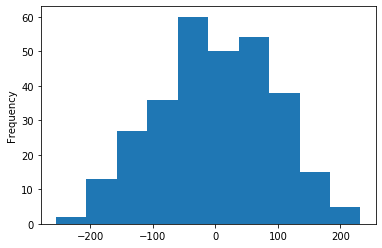

In [51]:
features_test = FeatureExtractor(test_dir).get_features()
features_test_aligned = FeatureExtractor("{}_aligned".format(test_dir)).get_features()
labels_test = LabelLoader(test_dir).get_labels(normalization=True).dropna()
df_test = merge_x_y(features_test_aligned, labels_test)
labels_test["Trustworthy"].plot.hist()

In [56]:
# export to TSV for UMAP, TSNE
features = df_test.loc[:, range(2,130)]
meta = df_test.loc[:, "Face name":"Extroverted"]
features.to_csv("output/features/features_random.tsv", sep="\t", header=False)
meta.to_csv("output/features/meta_random.tsv", sep="\t", header=True)

In [57]:
X_test = Regressor.make_X(features_test)
X_test_al = Regressor.make_X(features_test_aligned)
y_test = Interpreter.binarize(labels_test[label], threshold=labels_test[label].mean())
labels_test_aligned = merge_x_y(features_test_aligned, labels_test)[label]
y_test_al = Interpreter.binarize(labels_test_aligned, threshold=labels_test_aligned.mean())

In [58]:
clf.score(X_test, y_test)

0.49666666666666665

In [59]:
clf_aligned.score(X_test_al, y_test_al)

0.44

In [60]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.43666666666666665

Feature importance?

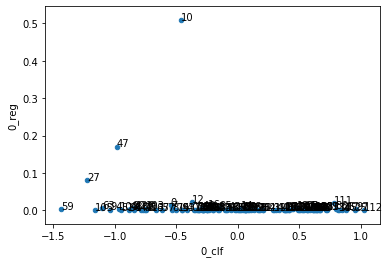

In [62]:
import matplotlib.pyplot as plt

# for random forest
# clf_imp = pd.DataFrame(clf.feature_importances_).sort_values(0, ascending=False)
# for coefs
clf_imp = pd.DataFrame(clf.coef_).transpose().sort_values(0, ascending=False)
imps = clf_imp.join(reg_imp, lsuffix="_clf", rsuffix="_reg")
fig, ax = plt.subplots()
imps.plot("0_clf", "0_reg", kind="scatter", ax=ax)
for k, v in imps.iterrows():
    ax.annotate(k, v)

Observation: the same two embeddings are the most important (10 and 47). Is this true for other labels?

Answer: barely. Not sure that these importances are significant - how can we trace them back to the original images, given that they're embeddings?

Attractive


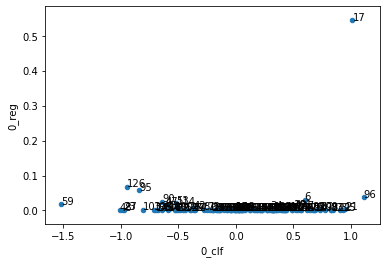

Competent


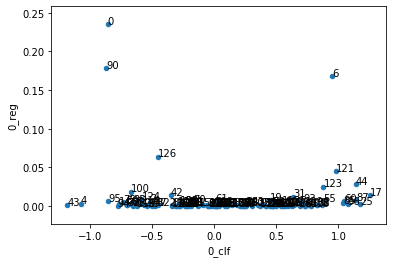

Dominant


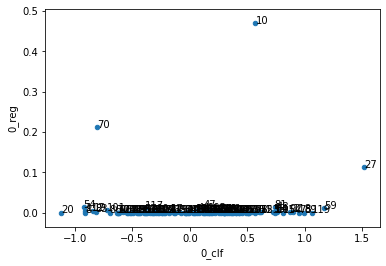

Extroverted


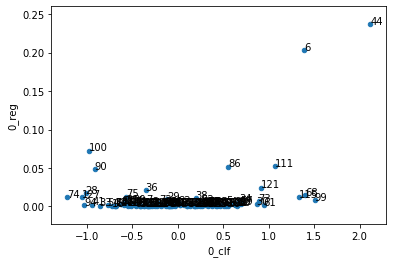

Likeable


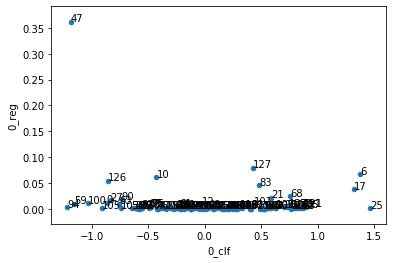

Trustworthy


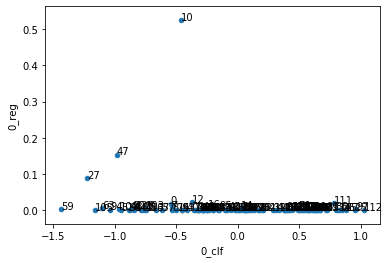

In [63]:
def feature_importance(label):
    reg = Regressor(df, label)
    reg.fit(split=False)
    reg_imp = pd.DataFrame(reg.reg.feature_importances_).sort_values(0, ascending=False)
#     clf = RandomForestClassifier(n_estimators=100)
    clf = LogisticRegression(max_iter=1000)
    X = reg.X
    y = reg.y
    # convert y to binary
    y = (y > 0).astype(int)
    clf.fit(X, y)
    # for random forest
    # clf_imp = pd.DataFrame(clf.feature_importances_).sort_values(0, ascending=False)
    # for coefs
    clf_imp = pd.DataFrame(clf.coef_).transpose().sort_values(0, ascending=False)
    imps = clf_imp.join(reg_imp, lsuffix="_clf", rsuffix="_reg")
    print(label)
    fig, ax = plt.subplots()
    imps.plot("0_clf", "0_reg", kind="scatter", ax=ax)
    for k, v in imps.iterrows():
        ax.annotate(k, v)
    plt.show()
#     return reg_imp, clf_imp
feature_importance("Attractive")
feature_importance("Competent")
feature_importance("Dominant")
feature_importance("Extroverted")
feature_importance("Likeable")
feature_importance("Trustworthy")

### Perturbations

For this section, using an SVC model (best suited, and no need for interpretability like in last section).

In [64]:
from keras.preprocessing import image

interpreter = Interpreter()
interpreter.fit(X_al, y_al)

In [ ]:
# a sample image
sample = features_train.sample()
sample_img = interpreter.get_img(*sample[['Face name', 'Source']].values[0], "maxdistinct_aligned", file="png")

In [ ]:
# a sample extraction
from keras.applications.inception_v3 import preprocess_input

img_processed = preprocess_input(image.img_to_array(sample_img)).astype(float)
plt.imshow(img_processed / 2 + 0.5)

# need to load up face net
sample_embedding = interpreter.extraction_model.model.predict(np.array([img_processed]))
print(sample_embedding.shape)

In [ ]:
# a sample classification
pred = interpreter.predict_fn(np.array([img_processed]))
pred

In [ ]:
interpreter.explain_img(sample_img, "Trustworthy", num_samples=500)

Now let's try with a variety of images.

Generating Trustworthy regressor
ID10_Trustworthiness (300 faces)_-125 25MaxDistinct_Trustworthy-FineGrain
ID10_Trustworthiness (300 faces)_-125
Image ID10_Trustworthiness (300 faces)_-125 w/ ground truth val -125.0
Explaining label Negative (p=[0.86608226]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


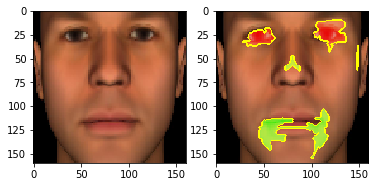

In [128]:
from regression.api import interpret

interpret('Trustworthy', ['data/maxdistinct_aligned'], 'data/maxdistinct_aligned', n=1, file='png', num_samples=500)

Generating Trustworthy regressor
f42887_e_282 random_aligned
f42887_e_282
Image f42887_e_282 w/ ground truth val 115.23989878151386
Explaining label Positive (p=[0.72198581]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


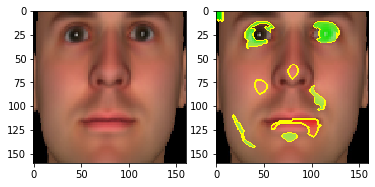

In [139]:
interpret('Trustworthy', ['data/maxdistinct_aligned'], 'data/random_aligned', n=1, file='png', num_samples=500)

**Aligned Todorov Faces**

Do the important features changed when the Todorov faces are cropped and aligned with OpenFace?

In [141]:
for i in range(3):
    sample = df[df[label].notna()].sample()
    
    print("## WITHOUT ALIGNMENT ##")
    sample_img = interpreter.get_img(*sample[['Face name', 'Source']].values[0], "maxdistinct")
    interpreter.explain_img(sample_img, sample['Face name'].values[0], sample[label].values[0])
    
    print("## WITH ALIGNMENT ##")
    sample_img = interpreterget_img(*sample[['Face name', 'Source']].values[0], "maxdistinct_aligned", file="png")
    interpreter.explain_img(sample_img, sample['Face name'].values[0], sample[label].values[0])

## WITHOUT ALIGNMENT ##
Image -25.0 w/ ground truth val None
Explaining label Negative (p=[0.99718175]) for attribute ID18_Trustworthiness (300 faces)_-025


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


KeyboardInterrupt: 

### Test Sets

Let's do feature analysis on our test sets to see if the model considers the same types of features (is it accurately picking out the faces?)

**Races**

Generating Trustworthy regressor
blackman_90 blackman
blackman_90
Image blackman_90 w/ ground truth val None
Explaining label Positive (p=[1.]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


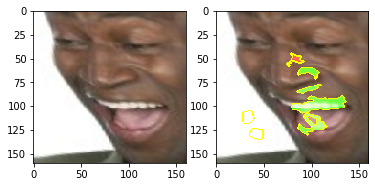

In [144]:
interpret(
    'Trustworthy', 
    ['data/maxdistinct_aligned'], 
    '../data/people_all_aligned',
    n=1, 
    file='png',
    ground_truth=False,
    num_samples=500
)

**Politicians**

In [145]:
# classification accuracy
features_pol = FeatureExtractor('../data/politicians-database_aligned').get_features()
results = pd.read_csv("../data/politicians-database/coding.csv")[["Full Label", "Competency"]]
results.columns = ["Face name", "competency_ground"]
results["competency_norm"] = (results["competency_ground"] - results["competency_ground"].mean()) / results["competency_ground"].std()
results = results.set_index("Face name")
joined = features_pol.join(results, on="Face name").dropna()
X_pol = Regressor.make_X(joined.drop(columns=["competency_ground", "competency_norm"]))
y_pol = joined["competency_norm"]
y_pol_bin = binarize(y_pol)

In [146]:
# 'explained_variance', 'neg_root_mean_squared_error'
from sklearn.metrics import explained_variance_score, mean_squared_error

y_pred = reg_aligned.reg.predict(X_pol)
explained_variance_score(y_pred, y_pol)

0.0021859343183210367

In [147]:
mean_squared_error(y_pred, y_pol, squared=False)

56.97895091280643

In [148]:
clf.score(X_pol, y_pol_bin)

0.49156118143459915

Generating Competent regressor
S2006MA0034T0067 Senate_all_stimuli
S2006MA0034T0067
Image S2006MA0034T0067 w/ ground truth val None
Explaining label Negative (p=[0.9993448]) for attribute Competent


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


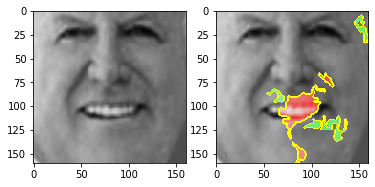

In [149]:
interpret(
    'Competent', 
    ['data/maxdistinct_aligned'], 
    '../data/politicians-database_aligned',
    n=1, 
    file='png',
    ground_truth=False,
    num_samples=500
)

**Occupations**

Generating Trustworthy regressor
physician_89 physician
physician_89
Image physician_89 w/ ground truth val None
Explaining label Negative (p=[0.90373625]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


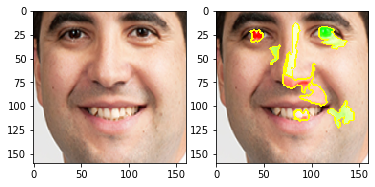

In [151]:
interpret(
    'Trustworthy', 
    ['data/maxdistinct_aligned'], 
    '../data/occupations_aligned',
    n=1, 
    file='png',
    ground_truth=False,
    num_samples=500
)

**Average Faces**

Generating Trustworthy regressor
averagecambodianwoman pacific
averagecambodianwoman
Image averagecambodianwoman w/ ground truth val None
Explaining label Negative (p=[0.9927685]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


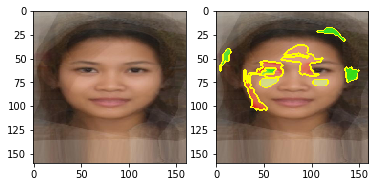

In [153]:
interpret(
    'Trustworthy', 
    ['data/maxdistinct_aligned'], 
    '../data/average-faces',
    n=1, 
    ground_truth=False,
    num_samples=500
)

## Error Analysis

### Politician Faces

In [64]:
errors = pd.read_csv("output/preds/politicians-error.csv", index_col=0, header=0, names=["name", "error", "actual", "pred"])
errors.head(5)

,name,error,actual,pred
1,S2006UT0050T0099,305.636515,-194.136515,111.50
2,G1998NY0254T0507,290.371026,-175.121026,115.25
3,G2006NY0173T0345,278.597791,-146.597791,132.00
4,G2002ME0200T0399,274.851663,-151.351663,123.50
5,G2001NJ0221N0442,271.630681,133.880681,-137.75


Error: 305.636515165696
Actual: -194.13651516569598
Predicted: 111.5
Image  w/ ground truth val -194.13651516569598
Explaining label Negative (p=[0.99999976]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


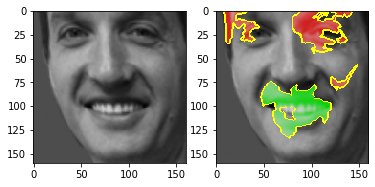

Error: 290.37102553640597
Actual: -175.121025536406
Predicted: 115.25
Image  w/ ground truth val -175.121025536406
Explaining label Positive (p=[0.98852134]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


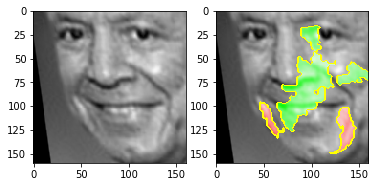

Error: 278.597791092472
Actual: -146.597791092472
Predicted: 132.0
Image  w/ ground truth val -146.597791092472
Explaining label Negative (p=[0.99996582]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


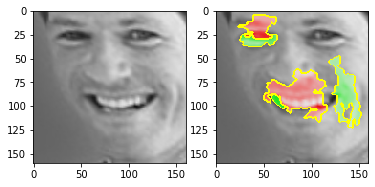

Error: 274.85166349979403
Actual: -151.351663499794
Predicted: 123.5
Image  w/ ground truth val -151.351663499794
Explaining label Negative (p=[0.9999999]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


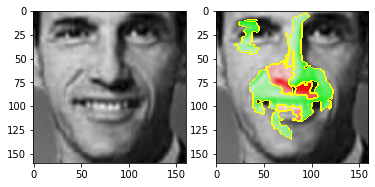

Error: 271.63068093955
Actual: 133.88068093955
Predicted: -137.75
Image  w/ ground truth val 133.88068093955
Explaining label Negative (p=[0.98803311]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


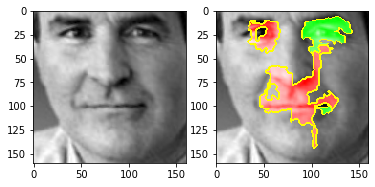

In [72]:
for outlier in errors.head(5).itertuples():
    print("Error: {}".format(outlier.error))
    print("Actual: {}".format(outlier.actual))
    print("Predicted: {}".format(outlier.pred))
    subdir = "Governors" if outlier.name.startswith("G") else "Senate"
    img = get_img(
        outlier.name, 
        "{}_all_stimuli".format(subdir), 
        "politicians-database_aligned", 
        d="../data", 
        file="png"
    )
    explain_img(img, name="", ground_truth=outlier.actual)

Error: 1.4874018686211599
Actual: -42.0125981313788
Predicted: -43.5
Image  w/ ground truth val -42.0125981313788
Explaining label Positive (p=[1.]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


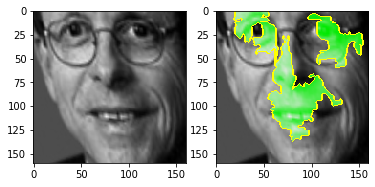

Error: 0.979657053976354
Actual: -51.5203429460236
Predicted: -52.5
Image  w/ ground truth val -51.5203429460236
Explaining label Negative (p=[0.99468217]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


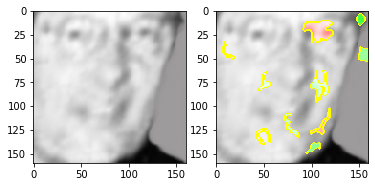

Error: 0.958384428865084
Actual: 24.541615571134898
Predicted: 25.5
Image  w/ ground truth val 24.541615571134898
Explaining label Positive (p=[0.9999999]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


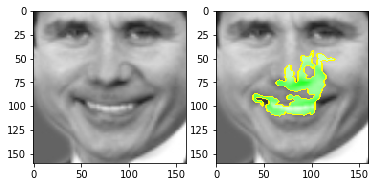

Error: 0.9486777953970741
Actual: -89.55132220460291
Predicted: -90.5
Image  w/ ground truth val -89.55132220460291
Explaining label Negative (p=[0.9999999]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


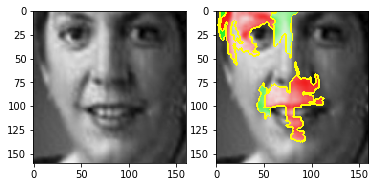

Error: 0.52225353452285
Actual: 0.77225353452285
Predicted: 0.25
Image  w/ ground truth val 0.77225353452285
Explaining label Negative (p=[0.99999946]) for attribute Trustworthy


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


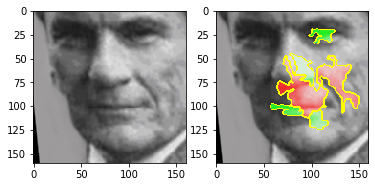

In [74]:
for outlier in errors.dropna().tail(5).itertuples():
    print("Error: {}".format(outlier.error))
    print("Actual: {}".format(outlier.actual))
    print("Predicted: {}".format(outlier.pred))
    subdir = "Governors" if outlier.name.startswith("G") else "Senate"
    img = get_img(
        outlier.name, 
        "{}_all_stimuli".format(subdir), 
        "politicians-database_aligned", 
        d="../data", 
        file="png"
    )
    explain_img(img, name="", ground_truth=outlier.actual)

### Random Faces

Attractive


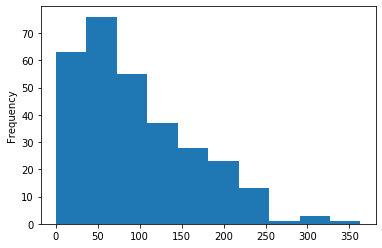

Competent


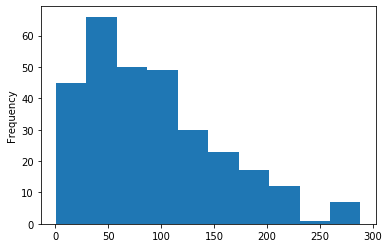

Trustworthy


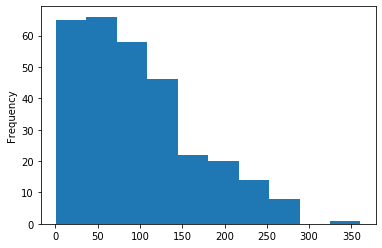

Dominant


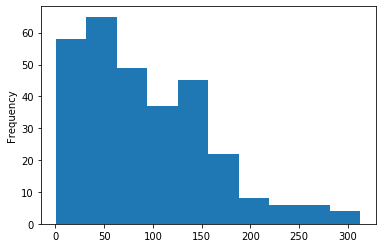

Extroverted


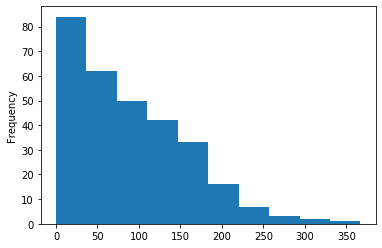

Likeable


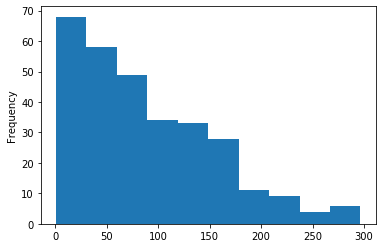

In [118]:
for label in LabelLoader.base_labels:
    print(label)
    labels_test = LabelLoader("data/random_aligned").get_labels(normalization=True).dropna()
    errors = merge_x_y(features_test_aligned, labels_test[["Face name", label]])[["Face name", label]]
    errors['name'] = errors['Face name']
    errors["actual"] = errors[label]
    errors["pred"] = reg_aligned.predict(Regressor.make_X(features_test_aligned))
    errors["error"] = abs(errors["actual"] - errors["pred"])
    errors = errors.sort_values("error", ascending=False).drop(columns=[label, 'Face name'])
    errors["error"].plot.hist()
    plt.show()

Error: 296.4391541161309
Actual: -194.93915411613088
Predicted: 101.5
Image  w/ ground truth val -194.93915411613088
Explaining label Positive (p=[0.97666963]) for attribute Likeable


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


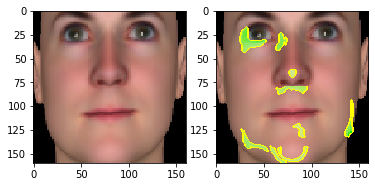

Error: 294.01270575394597
Actual: -180.01270575394597
Predicted: 114.0
Image  w/ ground truth val -180.01270575394597
Explaining label Negative (p=[0.99701611]) for attribute Likeable


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


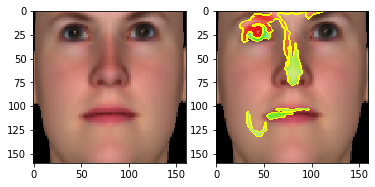

Error: 290.49880856863524
Actual: -184.99880856863524
Predicted: 105.5
Image  w/ ground truth val -184.99880856863524
Explaining label Negative (p=[0.9999999]) for attribute Likeable


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


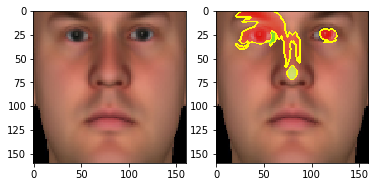

Error: 277.7367670676042
Actual: 163.48676706760418
Predicted: -114.25
Image  w/ ground truth val 163.48676706760418
Explaining label Positive (p=[0.57500992]) for attribute Likeable


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


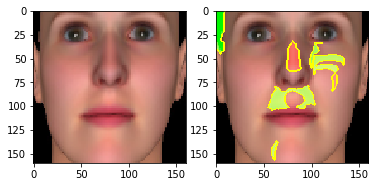

Error: 267.85201026135144
Actual: 133.60201026135147
Predicted: -134.25
Image  w/ ground truth val 133.60201026135147
Explaining label Negative (p=[0.99480699]) for attribute Likeable


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


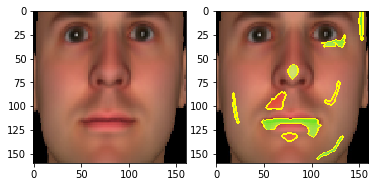

In [119]:
for outlier in errors.head(5).itertuples():
    print("Error: {}".format(outlier.error))
    print("Actual: {}".format(outlier.actual))
    print("Predicted: {}".format(outlier.pred))
    img = get_img(
        outlier.name, 
        "", 
        "random_aligned",
        file="png"
    )
    explain_img(img, name="", ground_truth=outlier.actual)

Error: 1.8871939852042772
Actual: 19.112806014795723
Predicted: 21.0
Image  w/ ground truth val 19.112806014795723
Explaining label Positive (p=[0.99998082]) for attribute Likeable


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


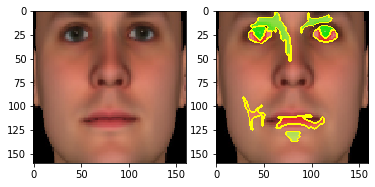

Error: 1.2738064757366558
Actual: -15.726193524263344
Predicted: -17.0
Image  w/ ground truth val -15.726193524263344
Explaining label Positive (p=[0.9956488]) for attribute Likeable


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


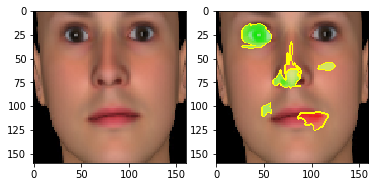

Error: 1.1109503305160615
Actual: -45.61095033051606
Predicted: -44.5
Image  w/ ground truth val -45.61095033051606
Explaining label Positive (p=[0.92477537]) for attribute Likeable


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


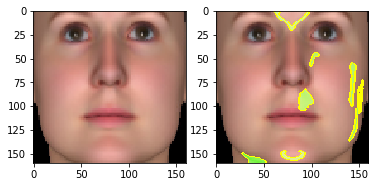

Error: 0.7249477766765295
Actual: -120.27505222332347
Predicted: -121.0
Image  w/ ground truth val -120.27505222332347
Explaining label Negative (p=[0.99999961]) for attribute Likeable


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


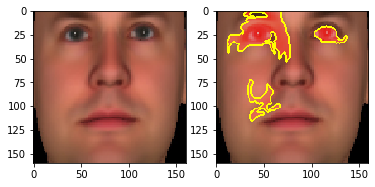

Error: 0.7141520232322787
Actual: -5.785847976767721
Predicted: -6.5
Image  w/ ground truth val -5.785847976767721
Explaining label Positive (p=[0.97180783]) for attribute Likeable


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


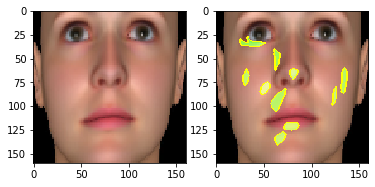

In [120]:
for outlier in errors.tail(5).itertuples():
    print("Error: {}".format(outlier.error))
    print("Actual: {}".format(outlier.actual))
    print("Predicted: {}".format(outlier.pred))
    img = get_img(
        outlier.name, 
        "", 
        "random_aligned",
        file="png"
    )
    explain_img(img, name="", ground_truth=outlier.actual)

## Interactive View of LIME Analysis

### Random Faces

In [136]:
from IPython.display import Image
from ipywidgets import interact, SelectionSlider, Layout
from regression.api import get_regressor
import os


def format_val(val):
    return "➕" if val else "➖"

def interpret_widget(interpret_dir, label, labels=None):
    reg = get_regressor(label, ["data/maxdistinct_aligned"])
    X = reg.X
    y = reg.y
    reg.fit()

    interpreter = Interpreter()
    interpreter.fit(X, y)

    features = FeatureExtractor(interpret_dir).get_features()
    labels = LabelLoader(interpret_dir).get_labels(normalization=True) if labels is None else labels
    features_interpret = merge_x_y(features, labels).dropna(subset=[label])
    features_interpret["pred"] = reg.predict(reg.make_X(features_interpret.drop(columns=labels.columns)))
    features_interpret["pred_bin"] = interpreter.clf.predict(reg.make_X(features_interpret.drop(columns=["pred"]+list(labels.columns))))
    features_interpret["label"] = features_interpret[label]
    features_interpret["label_bin"] = Interpreter.binarize(features_interpret[label])
    features_interpret = features_interpret.sort_values(["pred_bin", "label_bin"])
    
    print("Accuracy: {}".format((features_interpret["pred_bin"] == features_interpret["label_bin"]).sum() / features_interpret.shape[0]))

    widget = SelectionSlider(
        options=list(features_interpret.itertuples(index=False)),
        description='Image: ',
        disabled=False,
        orientation='horizontal',
        readout=True,
        layout=Layout(width='70%')
    )
    
    @interact
    def show_images(face=widget):
        t = face.pred_bin == face.label_bin
        print("{} {} {} - {}".format(
            "✅" if t else "❌", 
            "TRUE" if t else "FALSE", 
            "POSITIVE" if face.pred_bin else "NEGATIVE",
            face._0
        ))
        print("Pred: {}\t(reg: {})".format(
            format_val(face.pred_bin),
            face.pred
        ))
        print("Actual: {}\t(reg: {})".format(
            format_val(face.label_bin),
            face.label
        ))
        display(Image("output/lime/{}/{}.png".format(os.path.basename(interpret_dir), face._0)))

In [137]:
interpret_widget("data/random_aligned", "Trustworthy")

Generating Trustworthy regressor
Extracting training features for data/maxdistinct_aligned...
Extracting labels for data/maxdistinct_aligned...
Accuracy: 0.6


interactive(children=(SelectionSlider(description='Image: ', layout=Layout(width='70%'), options=(Pandas(_0='f…

In [138]:
results = pd.read_csv("../data/politicians-database/coding.csv")[["Full Label", "Competency"]]
results.columns = ["Face name", "competency_ground"]
results["Competent"] = (results["competency_ground"] - results["competency_ground"].mean()) / results["competency_ground"].std()
results = results.set_index("Face name")

interpret_widget("../data/politicians-database_aligned", "Competent", labels=results)

Generating Competent regressor
Extracting training features for data/maxdistinct_aligned...
Extracting labels for data/maxdistinct_aligned...
Accuracy: 0.5084388185654009


interactive(children=(SelectionSlider(description='Image: ', layout=Layout(width='70%'), options=(Pandas(_0='G…